# regression with data generated from a few more settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
from multiprocessing import Pool
from helper import ff_2

In [2]:
name = 'Sim_reg'
num_interact = 3
order = 3
SNR=50
noise_type='Gaussian'
final_results = {}
recorded = {}
p = Pool(16)

In [23]:
with open("082_save.pk", 'rb') as f:
    final_results = pk.load(f)
    recorded = pk.load(f)

In [7]:
#ff_2(name, num_interact, order, SNR, 0, 1, 'Gaussian', 1)

In [3]:
for overlap in [0, 1, 2]:
    pooled_results = p.starmap(ff_2, [(name, num_interact, order, SNR, 0, overlap, 'Gaussian', ind) for ind in range(40)])
    for ind in range(40):
        final_results = {**final_results, **pooled_results[ind][0]}
        recorded = {**recorded, **pooled_results[ind][1]}
    print(overlap)
    #with open("082_save_2_3.pk", 'wb') as f:
    #    pk.dump(final_results, f)
    #    pk.dump(recorded, f)

0
1
2


In [4]:
for feature_correlation in [0, 0.2, 0.4, 0.6]:
    pooled_results = p.starmap(ff_2, [(name, num_interact, order, SNR, feature_correlation, 0, 'Gaussian', ind) for ind in range(40)])
    for ind in range(40):
        final_results = {**final_results, **pooled_results[ind][0]}
        recorded = {**recorded, **pooled_results[ind][1]}
    print(feature_correlation)
    with open("082_save_correlated_2_3.pk", 'wb') as f:
        pk.dump(final_results, f)
        pk.dump(recorded, f)

0
0.2
0.4
0.6


In [5]:
for noise_type in ['Gaussian', 'Laplacian', 'Cauchy']:
    pooled_results = p.starmap(ff_2, [(name, num_interact, order, SNR, 0, 0, noise_type, ind) for ind in range(40)])
    for ind in range(16):
        final_results = {**final_results, **pooled_results[ind][0]}
        recorded = {**recorded, **pooled_results[ind][1]}
    print(noise_type)
    with open("082_save_noise_2_3.pk", 'wb') as f:
        pk.dump(final_results, f)
        pk.dump(recorded, f)

Gaussian
Laplacian
Cauchy


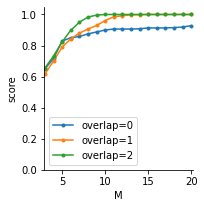

In [24]:
fig, ax = plt.subplots( figsize=(8/3,3))
for j, overlap in enumerate(range(0, 3)):
    # depth weighted 
    min_length = 20
    scores = []
    for x, v in final_results.items():
        if x[0] == 0 and x[1] == overlap and x[2] == 'Gaussian' and x[4] == 'soft' and x[5] == 'mild':
            if len(v) < min_length:
                v = list(v) + [v[-1]] * (min_length - len(v))
            scores.append(v[:min_length])
    scores = np.array(scores)
    ax.errorbar(
        np.arange(1, min_length+1),
        np.nanmean(scores, axis=0),
        marker='.',
    )
    
ax.set_ylim([0,1.05])
ax.set_xlim([2.9, 20.2])
ax.legend(['overlap=0', 'overlap=1', 'overlap=2'])
#ax.set_title(f"Number of interactions {num_interact} with order {order}", fontsize=10)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_ylabel(f"score")
ax.set_xlabel("M")
#ax.set_title(f"interaction-order = {order}")
# plt.tight_layout()
plt.show()

In [9]:
# for x, v in recorded.items():
#     if x[0] == 0 and x[1] == 2 and x[2] == 'Gaussian' and x[4] == 'soft' and x[5] == 'mild':
        #print(v[3][:2])
        #print(v[2][:2])

In [21]:
with open("082_save_correlated.pk", 'rb') as f:
    final_results = pk.load(f)
    recorded = pk.load(f)

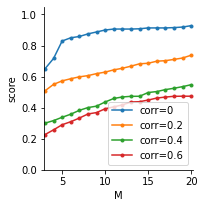

In [22]:
fig, ax = plt.subplots(figsize=(8/3,3))
for j, corr in enumerate([0, 0.2, 0.4, 0.6]):
    # depth weighted 
    min_length = np.min([len(v) for x, v in final_results.items() if x[0] == corr and x[1] == 0 and x[2] == 'Gaussian' and x[4] == 'soft' and x[5] == 'mild'])
    min_length = min(20, min_length)
    min_length = 20
    scores = []
    for x, v in final_results.items():
        if x[0] == corr and x[1] == 0 and x[2] == 'Gaussian' and x[4] == 'soft' and x[5] == 'mild':
            if len(v) < min_length:
                v = list(v) + [v[-1]] * (min_length - len(v))
            scores.append(v[:min_length])
    scores = np.array(scores)
    ax.errorbar(
        np.arange(1, min_length+1),
        np.nanmean(scores, axis=0),
        marker='.',
    )

ax.set_ylim([0,1.05])
ax.set_xlim([2.9, 20.2])
ax.legend(['corr=0', 'corr=0.2', 'corr=0.4', 'corr=0.6'])
#ax.set_title(f"Number of interactions {num_interact} with order {order}", fontsize=10)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_ylabel(f"score")
ax.set_xlabel("M")
#ax.set_title(f"interaction-order = {order}")
# plt.tight_layout()
plt.show()

In [28]:
with open("082_save_noise_2_3.pk", 'rb') as f:
    final_results = pk.load(f)
    recorded = pk.load(f)

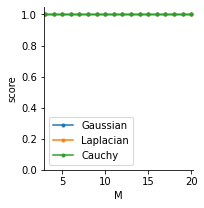

In [29]:
fig, ax = plt.subplots(figsize=(8/3.,3))
for j, noise in enumerate(["Gaussian", "Laplacian", "Cauchy"]):
    # depth weighted 
    min_length = np.min([len(v) for x, v in final_results.items() if x[0] == 0 and x[1] == 0 and x[2] == noise and x[4] == 'soft' and x[5] == 'mild'])
    min_length = min(20, min_length)
    min_length = 20
    scores = []
    for x, v in final_results.items():
        if x[0] == 0 and x[1] == 0 and x[2] == noise and x[4] == 'soft' and x[5] == 'mild':
            if len(v) < min_length:
                v = list(v) + [v[-1]] * (min_length - len(v))
            scores.append(v[:min_length])
    scores = np.array(scores)
    ax.errorbar(
        np.arange(1, min_length+1),
        np.nanmean(scores, axis=0),
        marker='.',
    )

ax.set_ylim([0,1.05])
ax.set_xlim([2.9, 20.2])
ax.legend(['Gaussian', 'Laplacian', 'Cauchy'])
#ax.set_title(f"Number of interactions {num_interact} with order {order}", fontsize=10)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_ylabel(f"score")
ax.set_xlabel("M")
#ax.set_title(f"interaction-order = {order}")
# plt.tight_layout()
plt.show()

In [9]:
with open("082_save_2_3.pickle", "wb") as f:
    pk.dump(final_results, f)